/Users/austen/Car-ND/CarND-P5-Vehicle-Detection-master/dataset
total images:  17760
car images:  8792 non-car images:  8968
correct  car images:  8792
correct  non-car images:  8968
Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


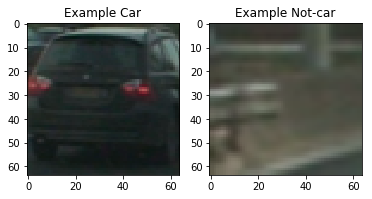

In [4]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

cwd = os.getcwd()
directory = cwd + "/dataset"
print(directory)
images = glob.glob('**/*/*/*.png') ## glob.glob(directory+'/*/*/*')
cars = []
notcars = []

for name in images:
    if "non-" in name:
        notcars.append(name)
    else:
        cars.append(name)
print("total images: ", len(images))
print("car images: ", len(cars), "non-car images: ", len(notcars) )

# validate the numbers
car_images = glob.glob(directory+'/vehicles/*/**.png')
notcar_images = glob.glob(directory+'/non-vehicles/*/**.png')
print("correct  car images: ", len(car_images))
print("correct  non-car images: ", len(notcar_images))
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    test_img = mpimg.imread(car_list[0]) 
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = test_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = test_img.dtype
    # Return data_dict
    return data_dict
    
data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car')
plt.show()

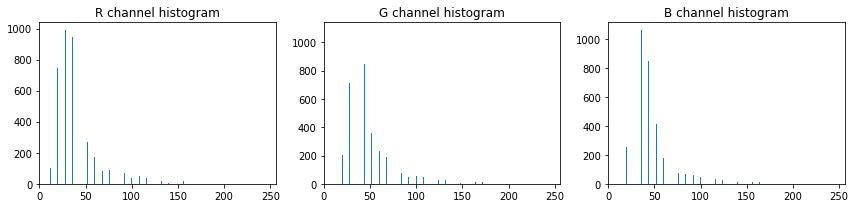

In [10]:
### This part is to show that histogram works

# Define a function to compute color histogram features  
def color_hist_show(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    
    bin_centers = (rhist[1][1:]+rhist[1][0:len(rhist[1])-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector for showing only
    
    return rhist, ghist, bhist, bin_centers, hist_features
def three_channel_histogram(ch1, ch2, ch3, channel, bincen, bins_range):
    start = bins_range[0]
    end = bins_range[1]
    channel_label = list(channel)
    if len(channel_label) != 3:
        print('incorrect channel label!')
        return
    if (ch1 is not None) and (ch2 is not None) and (ch3 is not None):
        fig = plt.figure(figsize=(12,3))
        plt.subplot(131)
        plt.bar(bincen, ch1[0])
        plt.xlim(start, end)
        plt.title(channel_label[0]+" channel histogram")
        plt.subplot(132)
        plt.bar(bincen, ch2[0])
        plt.xlim(start, end)
        plt.title(channel_label[1]+" channel histogram")
        plt.subplot(133)
        plt.bar(bincen, ch3[0])
        plt.xlim(start, end)
        plt.title(channel_label[2]+" channel histogram")
        fig.tight_layout()
        return 
    
    else:
        print('Your function is returning None for at least one variable...')

plt.close('all')
#car_ind = np.random.randint(0, len(cars))   
# Read in car image note that for png figure, mpimg returns [0,1] , cv2 return [0,255] but in BGR order
#car_image = 255*np.array(mpimg.imread(cars[car_ind]))
car_image = cv2.cvtColor(cv2.imread(cars[car_ind]), cv2.COLOR_BGR2RGB)

rh, gh, bh, bincen, feature_vec = color_hist_show(car_image, nbins=32, bins_range=(0, 256))
three_channel_histogram(rh, gh, bh, "RGB", bincen, bins_range=(0, 256))


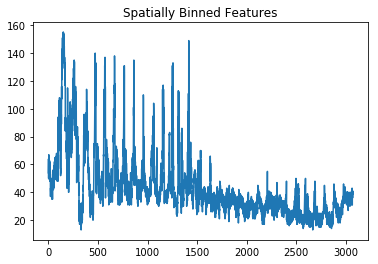

In [11]:
plt.close('all')
# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features
feature_vec = bin_spatial(car_image, size=(32, 32))
# Plot features
plt.plot(feature_vec)
plt.title('Spatially Binned Features')
plt.show()

In [12]:
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec, block_norm="L2-Hys")
        return features

# Define a function to extract HOG features from a list of images. 
# HOG feature is separately extracted considering that HOG is only done once to save time
def extract_spatial_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one; mpimg read png as RGB, but 0 to 1
        # this makes a difference since color_hist will seek between (0,256) rather than (0,1)
        #image = mpimg.imread(file)
        image = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # Apply color_hist() also with a color space option now
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        # Append the new feature vector to the features list
        features.append(np.concatenate((spatial_features, hist_features)))
    # Return list of feature vectors
    return features

def extract_HOG_features(imgs, cspace='RGB', orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one 
        # this doesnot matter if using mpimg.imread(file) or cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
        # after normalization, scaling considered. but need to make sure RGB is correct
        #image = mpimg.imread(file) will be a problem
        image = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        features.append(hog_features)
    # Return list of feature vectors
    return features


/Users/austen/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


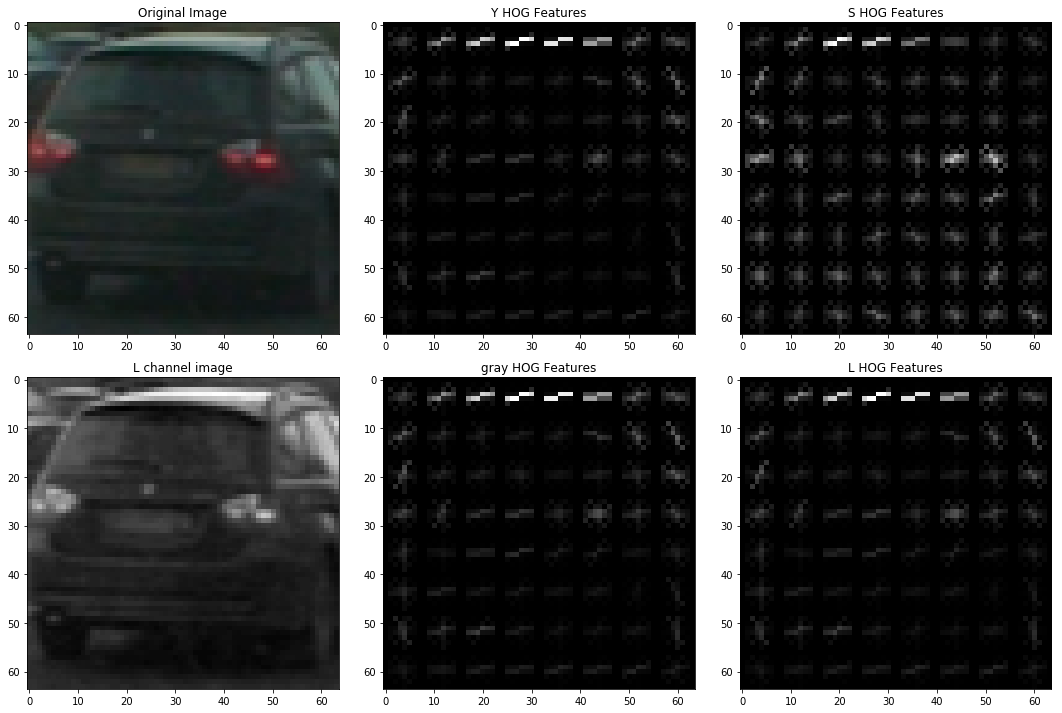

In [13]:
# This block is to test if hog_feature works

plt.close("all")
from skimage.feature import hog

## check if the normalization works
#car_ind = np.random.randint(0, len(cars))
#img = np.copy(mpimg.imread(cars[car_ind]))
orient = 9
pix_per_cell = 8
cell_per_block = 2

img = cv2.cvtColor(cv2.imread(cars[car_ind]), cv2.COLOR_BGR2RGB)
img_YCrCb = (cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb))
img_HLS = (cv2.cvtColor(img, cv2.COLOR_BGR2HLS))
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, hog_gray = get_hog_features(gray, orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)
_, hog_Y = get_hog_features(img_YCrCb[:,:,0], orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)
_, hog_L = get_hog_features(img_HLS[:,:,1], orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)
_, hog_S = get_hog_features(img_HLS[:,:,2], orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)
# Plot an example of raw and scaled features
fig = plt.figure(figsize=(15,10))
plt.subplot(231)
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.subplot(232)
plt.imshow(hog_Y,cmap='gray')
plt.title('Y HOG Features')
plt.subplot(233)
plt.imshow(hog_S,cmap='gray')
plt.title('S HOG Features')
plt.subplot(234)
plt.imshow(img_HLS[:,:,1],cmap='gray')
plt.title('L channel image')
plt.subplot(235)
plt.imshow(hog_gray,cmap='gray')
plt.title('gray HOG Features')
plt.subplot(236)
plt.imshow(hog_L,cmap='gray')
plt.title('L HOG Features')
fig.tight_layout()
plt.show()


In [14]:
import time
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.model_selection import train_test_split

spatial = 32
histbin = 32

colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"

t=time.time()
car_features = extract_spatial_features(cars, cspace=colorspace, spatial_size=(spatial, spatial),
                        hist_bins=histbin, hist_range=(0, 256))
notcar_features = extract_spatial_features(notcars, cspace=colorspace, spatial_size=(spatial, spatial),
                        hist_bins=histbin, hist_range=(0, 256))
t1=time.time()
print(round(t1-t, 1), 'Seconds to extract RGB features...')

car_HOG_features = extract_HOG_features(cars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_HOG_features = extract_HOG_features(notcars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)



total_car_feature = np.hstack((car_features, car_HOG_features))
total_notcar_feature = np.hstack((notcar_features, notcar_HOG_features))
t2 = time.time()
print(round(t2-t, 1), 'Seconds to extract HOG features...')

# Normalization of feature input per column or per feature
if len(total_car_feature) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((total_car_feature, total_notcar_feature)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)

else: 
    print('Your function only returns empty feature vectors...')
    
## HOG 7*7*2*2*9 *3, color spatial + color hist =3*32*32+32*3 sanity check
#print((np.asarray(car_features, dtype=np.float32)).shape)
#print((np.asarray(notcar_features, dtype=np.float32)).shape)
#print((np.asarray(car_HOG_features, dtype=np.float32)).shape)
#print((np.asarray(notcar_HOG_features, dtype=np.float32)).shape)

print((np.asarray(total_car_feature, dtype=np.float32)).shape)
print((np.asarray(total_notcar_feature, dtype=np.float32)).shape)

11.7 Seconds to extract RGB features...
133.0 Seconds to extract HOG features...
(8792, 8460)
(8968, 8460)


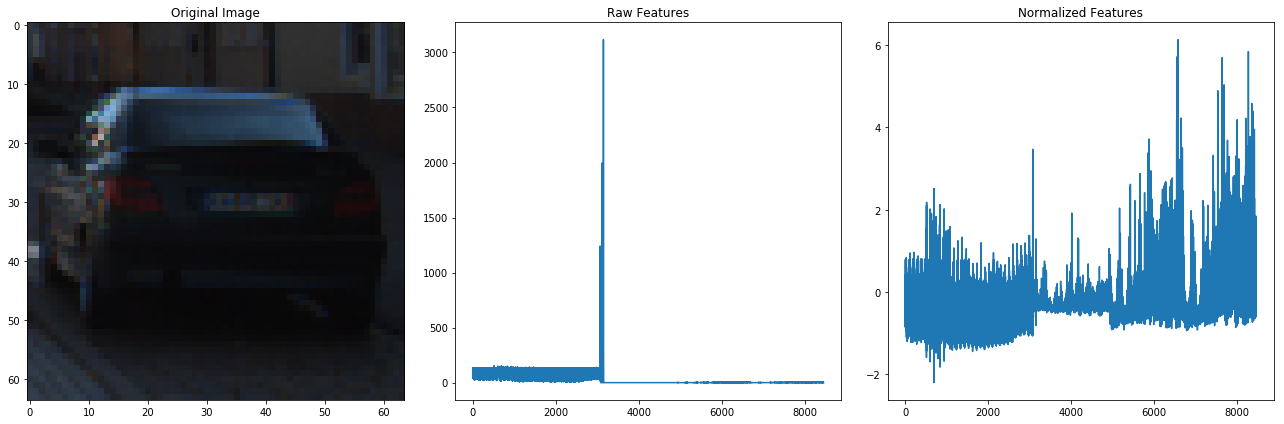

In [10]:
plt.close("all")

## check if the normalization works
#car_ind = np.random.randint(0, len(cars))
# Plot an example of raw and scaled features
fig = plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(mpimg.imread(cars[car_ind]))
plt.title('Original Image')
plt.subplot(132)
plt.plot(X[car_ind])
plt.title('Raw Features')
plt.subplot(133)
plt.plot(scaled_X[car_ind])
plt.title('Normalized Features')
fig.tight_layout()
plt.show()
    

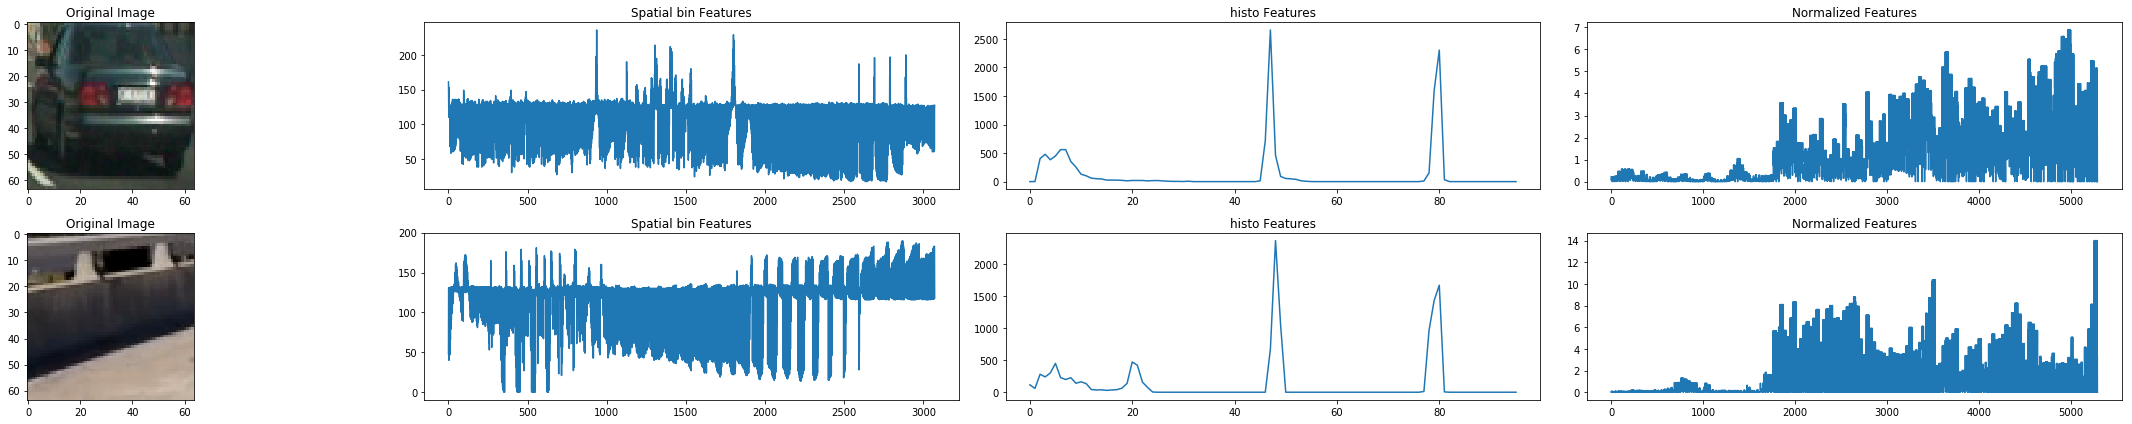

In [11]:
#car_ind = 682
plt.close("all")

## check if the normalization works
car_ind = np.random.randint(0, len(cars))
# Plot an example of raw and scaled features
fig = plt.figure(figsize=(32,6))
plt.subplot(241)
plt.imshow(mpimg.imread(cars[car_ind]))
plt.title('Original Image')
plt.subplot(242)
plt.plot(X[car_ind][0: 3072])
plt.title('Spatial bin Features')
plt.subplot(243)
plt.plot(X[car_ind][3072: 3168])
plt.title('histo Features')
plt.subplot(244)
plt.plot(X[car_ind][3168: 8460])
plt.title('Normalized Features')
plt.subplot(245)
plt.imshow(mpimg.imread(notcars[car_ind]))
plt.title('Original Image')
plt.subplot(246)
plt.plot(X[car_ind+8792][0: 3072])
plt.title('Spatial bin Features')
plt.subplot(247)
plt.plot(X[car_ind+8792][3072: 3168])
plt.title('histo Features')
plt.subplot(248)
plt.plot(X[car_ind+8792][3168: 8460])
plt.title('Normalized Features')
fig.tight_layout()
plt.show()
    

In [12]:
# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


rand_state = 41 #np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)
print('Feature vector length:', len(X_train[0]))

# Use a linear SVC
svc = LinearSVC()

# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print('Time to train SVC = {0:.2f} seconds'.format(t2-t))

# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

# Check the prediction time for 10 samples
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Feature vector length: 8460
Time to train SVC = 109.95 seconds
Test Accuracy of SVC =  0.9893
My SVC predicts:  [ 1.  1.  1.  0.  0.  0.  0.  0.  1.  0.]
For these 10 labels:  [ 1.  1.  1.  0.  0.  0.  0.  0.  1.  0.]
0.25905 Seconds to predict 10 labels with SVC


In [ ]:
import pickle

pickle.dump( svc, open( "saved_svc.p", "wb" ) )
pickle.dump( X_scaler, open( "saved_X_scaler.p", "wb" ) )

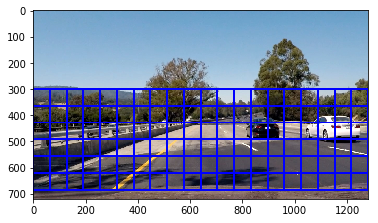

In [15]:
plt.close("all")
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread(cwd + '/test_images/test4.jpg')

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size

    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched 
    x_span = (x_start_stop[1] - x_start_stop[0])
    y_span = (y_start_stop[1] - y_start_stop[0]) 
    region_span = x_span * y_span
    # Compute the number of pixels per step in x/y
    pix_per_step_x = int(xy_window[0] * (1-xy_overlap[0]))
    pix_per_step_y = int(xy_window[1] * (1-xy_overlap[1]))
    # Compute the number of windows in x/y
    num_window_x = int ((x_span-xy_window[0]*xy_overlap[0])/pix_per_step_x)
    num_window_y = int ((y_span-xy_window[1]*xy_overlap[1])/pix_per_step_y)
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    for x_window in range(num_window_x):
        for y_window in range(num_window_y):
            box_0 = (pix_per_step_x * x_window + x_start_stop[0], pix_per_step_y * y_window + y_start_stop[0])
            box_1 = (box_0[0] + xy_window[0], box_0[1] + xy_window[1])
            
            window_list.append((box_0, box_1))
    #     Note: you could vectorize this step, but in practice
    #     you'll be considering windows one by one with your
    #     classifier, so looping makes sense
        # Calculate each window position
        # Append window position to list
    # Return the list of windows
    return window_list

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[300, None], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)
plt.show()

In [19]:

loaded_svc = pickle.load( open( "saved_svc.p", "rb" ) )
loaded_X_scaler = pickle.load( open( "saved_X_scaler.p", "rb" ) )


/Users/austen/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/austen/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator StandardScaler from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [20]:
# modified find_cars to have multi-scale window;so scales is now a list instead of a number
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YUV':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2HSV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    if conv == 'RGB2HLS':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

def find_cars(img, ystart, ystop, scales, svc, cspace, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    boxes = []
    draw_img = np.copy(img)

    # training data are from .png images (scaled 0 to 1 by mpimg) and the
    # image you are searching is a .jpg (scaled 0 to 255)
    #img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    #depending on what color channel the training is based on 
    # colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
    if cspace == "RGB":
        ctrans_tosearch = img_tosearch 
    elif cspace == "YCrCb":
        ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    elif cspace == "HLS":
        ctrans_tosearch = convert_color(img_tosearch, conv='RGB2HLS')
    elif cspace == "YUV":
        ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YUV')
    elif cspace == "HSV":
        ctrans_tosearch = convert_color(img_tosearch, conv='RGB2HSV')
    elif cspace == "LUV":
        ctrans_tosearch = convert_color(img_tosearch, conv='RGB2LUV')    
        
    for scale in scales:
        if scale != 1:
            imshape = ctrans_tosearch.shape
            ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))

        ch1 = ctrans_tosearch[:,:,0]
        ch2 = ctrans_tosearch[:,:,1]
        ch3 = ctrans_tosearch[:,:,2]

        # Define blocks and steps as above
        nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
        nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
        nfeat_per_block = orient*cell_per_block**2

        # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
        window = 64
        # A window is like a cropped image so blocks per window is calculated by the same formula as nxblocks
        nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
        # step size of a window in the unit of cells
        cells_per_step = 2  # Instead of overlap, define how many cells to step
        nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1  
        nysteps = (nyblocks- nblocks_per_window) // cells_per_step + 1 

        # Compute individual channel HOG features for the entire image
        hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)

        for xb in range(nxsteps):
            for yb in range(nysteps):
                ypos = yb*cells_per_step
                xpos = xb*cells_per_step
                # Extract HOG for this patch
                hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

                xleft = xpos*pix_per_cell
                ytop = ypos*pix_per_cell

                # Extract the image patch
                subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))

                # Get color features
                spatial_features = bin_spatial(subimg, size=spatial_size)
                hist_features = color_hist(subimg, nbins=hist_bins)
               # print(len(spatial_features), len(hist_features), len(hog_features))
                # Scale features and make a prediction
                test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
                #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
                test_prediction = svc.predict(test_features)

                if test_prediction == 1:
                    xbox_left = np.int(xleft*scale)
                    ytop_draw = np.int(ytop*scale)
                    win_draw = np.int(window*scale)
                    cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                    boxes.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
    return draw_img, boxes
    


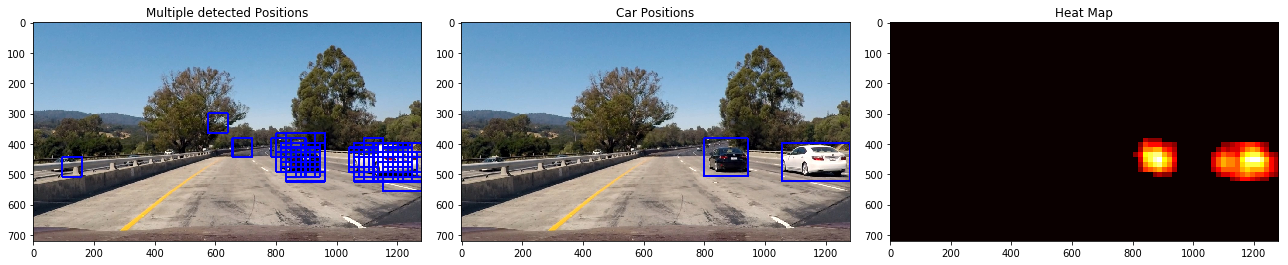

In [26]:
#### It is showing that choosing different color channels indeed can make a difference of performance, 
# not much in testing accruacy itself, but in terms of reducing false positive. See RGB Box and YCrCb Box
# The Next Step is to deal with false positive and overlapped detection
# step-1 single image heat map
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
plt.close("all")

image = mpimg.imread(cwd + '/test_images/test1.jpg')
ystart = 300
ystop = 656
scales = [1, 2]
spatial_size = (spatial, spatial) 
hist_bins = histbin
# X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins must be the same as before

cspace = "YCrCb"
svc = loaded_svc
X_scaler = loaded_X_scaler
out_img, box_list = find_cars(image, ystart, ystop, scales, svc, cspace, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size = (spatial, spatial) , hist_bins = histbin)


heat = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        # (xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)
        # heatmap[y1:y2, x1:x2] += 1
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1] + 1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Add heat to each box in box list
heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat, 2)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)


fig = plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(out_img)
plt.title('Multiple detected Positions')
plt.subplot(132)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(133)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()
plt.show()


In [35]:
# integrate into the frame pipeline
from collections import deque
#test_images = glob.glob('test_images/*.jpg')

MaxHistoryLength = 6
queue_recent_heatmap = deque([])
HeatThreshold = 4
def framePipeline(image):
    ystart_far = 350
    ystop_far = 478
    ystart_near = 400
    ystop_near = 656
    scales_far = [1, 1.1, 1.4]
    scales_near = [1.2, 1.6, 2.2, 3.3]
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    #svc, cspace, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins are all preset in training
    _, box_list_far = find_cars(image, ystart_far, ystop_far, scales_far, svc, cspace, X_scaler, orient, pix_per_cell, cell_per_block, 
                                 spatial_size = (spatial, spatial) , hist_bins = histbin)
    _, box_list_near = find_cars(image, ystart_near, ystop_near, scales_near, svc, cspace, X_scaler, orient, pix_per_cell, cell_per_block, 
                                 spatial_size = (spatial, spatial) , hist_bins = histbin)
    #merge the far and near lists of boxes
    box_list = box_list_far + box_list_near
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    #print(len(box_list), len(box_list_far),len(box_list_near))
    # Add heat to each box in box list
    heat = add_heat(heat,box_list)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat, HeatThreshold)
    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    
    #start the combine heatmap with zeros, not the current heatmap
    combine_heatmap = np.zeros_like(image[:,:,0]).astype(np.float)
    #current labeled area without history
    combine_heatmap[heatmap != 0] = 1
    # in order to deal with false positive, 
    # use the recent heatmaps to clear out the wrong false positive
    if len(queue_recent_heatmap) != 0:
        for heat_histroy in queue_recent_heatmap:
            #if historically the point is not marked as car, it is unlikely to be a car
            combine_heatmap[(heat_histroy == 0)] = 0
    
    queue_recent_heatmap.append(heatmap) # if use append(combine_heatmap), overkill the positives
    if len(queue_recent_heatmap) > MaxHistoryLength:
        queue_recent_heatmap.popleft()
    
    # Find final boxes from heatmap using label function
    labels = label(combine_heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    return draw_img


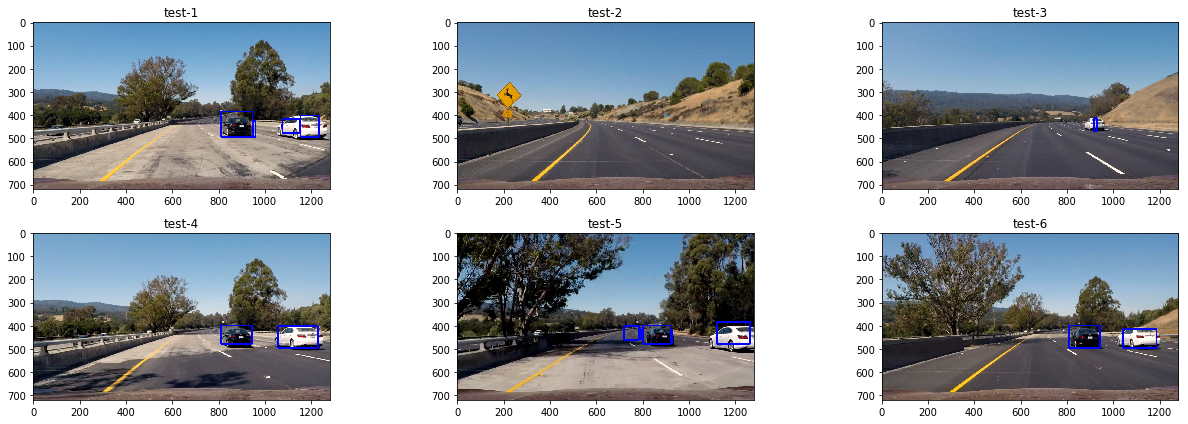

In [36]:
# My test block before considering heat map history, MaxHistoryLength = 0
plt.close("all")
test_images = glob.glob('test_images/*.jpg')
# Turn off the history
MaxHistoryLength = 0
fig = plt.figure(figsize=(18,6))

plt.subplot(231)
plt.imshow(framePipeline(mpimg.imread(test_images[0])))
plt.title('test-1')
plt.subplot(232)
plt.imshow(framePipeline(mpimg.imread(test_images[1])))
plt.title('test-2')
plt.subplot(233)
plt.imshow(framePipeline(mpimg.imread(test_images[2])))
plt.title('test-3')
plt.subplot(234)
plt.imshow(framePipeline(mpimg.imread(test_images[3])))
plt.title('test-4')
plt.subplot(235)
plt.imshow(framePipeline(mpimg.imread(test_images[4])))
plt.title('test-5')
plt.subplot(236)
plt.imshow(framePipeline(mpimg.imread(test_images[5])))
plt.title('test-6')

fig.tight_layout()
plt.show()
# After trying a few threshold values, I decided to use threshold = 2 given the 3 scales window scanning

In [47]:
# Import everything needed to edit/save/watch video clips
# integrate into the frame pipeline

MaxHistoryLength = 5
queue_recent_heatmap = deque([])
HeatThreshold = 5
from moviepy.editor import VideoFileClip
from IPython.display import HTML
#white_output = 'output_video_sub_0-10s.mp4'
white_output = 'output_video_th=5_his=5_all.mp4'
#short clip for testing
#clip1 = VideoFileClip("project_video.mp4").subclip(29,34)
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(framePipeline)
white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video output_video_th=5_his=5_all.mp4
[MoviePy] Writing video output_video_th=5_his=5_all.mp4


100%|█████████▉| 1260/1261 [43:10<00:02,  2.05s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video_th=5_his=5_all.mp4 



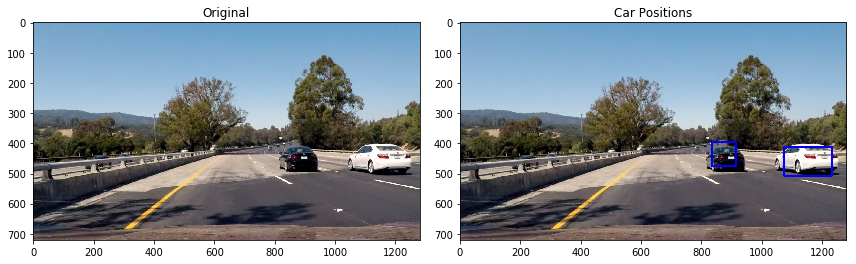

In [48]:
plt.close("all")
HeatThreshold = 5
MaxHistoryLength = 4
queue_recent_heatmap = deque([])

image = mpimg.imread(cwd + '/test_images/test4.jpg')
draw_img = framePipeline(image)
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.subplot(122)
plt.imshow(draw_img)
plt.title('Car Positions')

fig.tight_layout()
plt.show()


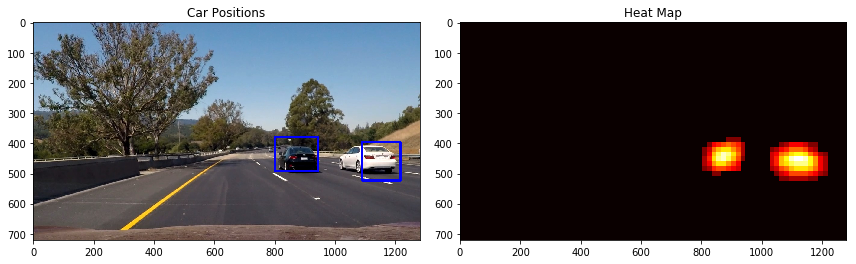

In [287]:
plt.close('all')
labels = label(combine_heatmap)

draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()
plt.show()


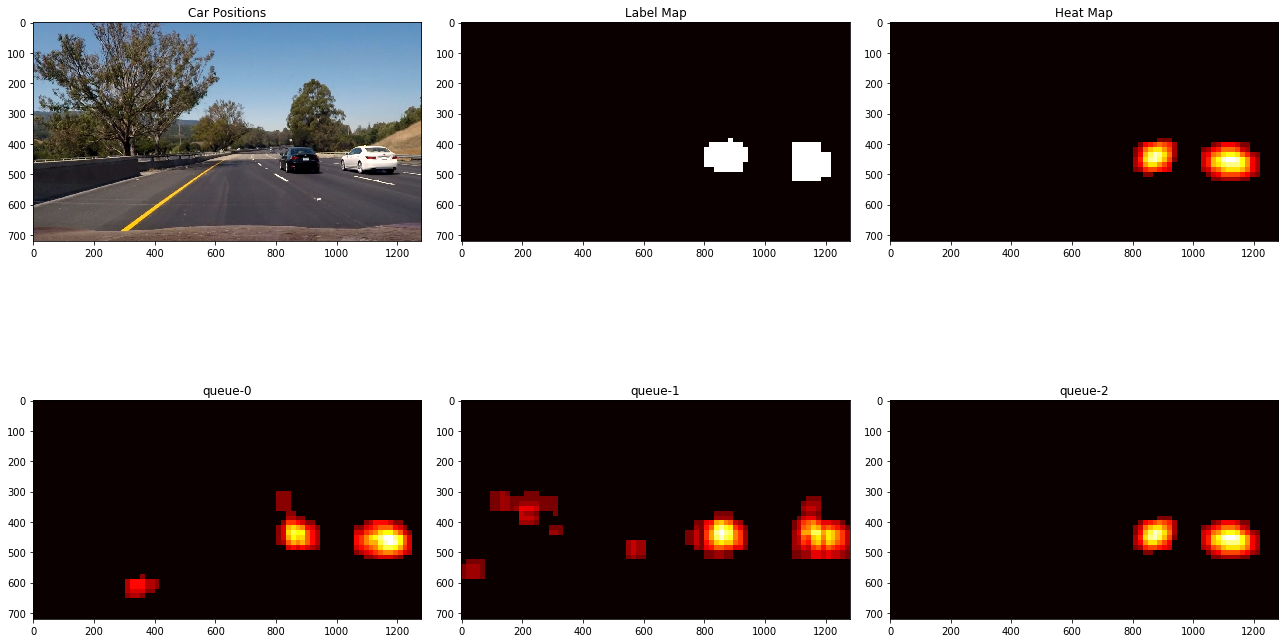

In [282]:
combine_heatmap[heatmap != 0] = 1
combine_heatmap[(queue_recent_heatmap[0] == 0)] = 0
combine_heatmap[(queue_recent_heatmap[1] == 0)] = 0
combine_heatmap[(queue_recent_heatmap[2] == 0)] = 0
fig = plt.figure(figsize=(18,12))
plt.subplot(231)
plt.imshow(output_test[5])
plt.title('Car Positions')
plt.subplot(232)
plt.imshow(combine_heatmap, cmap='hot')
plt.title('Label Map')
plt.subplot(233)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')

plt.subplot(234)
plt.imshow(queue_recent_heatmap[0], cmap ='hot')
plt.title('queue-0')
plt.subplot(235)
plt.imshow(queue_recent_heatmap[1], cmap='hot')
plt.title('queue-1')
plt.subplot(236)
plt.imshow(queue_recent_heatmap[2], cmap='hot')
plt.title('queue-2')
fig.tight_layout()
plt.show()
  

In [81]:
from collections import deque
test_images = glob.glob('test_images/*.jpg')
ystart = 300
ystop = 660
scales = [1, 1.5, 2]

queue_recent_heatmap = deque([])

MaxHistoryLength = 2
output_test = []
output_heat = []
#print(len(test_images))
for image_name in test_images:
    image = mpimg.imread(image_name)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    
    out_img,box_list = find_cars(image, ystart, ystop, scales, svc, cspace, X_scaler, orient, pix_per_cell, cell_per_block, 
                                 spatial_size = (spatial, spatial) , hist_bins = histbin)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    
    # Add heat to each box in box list
    heat = add_heat(heat,box_list)
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat, 1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    #start the combine heatmap with zeros not the current heatmap
    combine_heatmap = np.zeros_like(image[:,:,0]).astype(np.float)
    #current labeled area without history
    combine_heatmap[heatmap != 0] = 1
    
    for heat_histroy in queue_recent_heatmap:
        combine_heatmap[(heat_histroy == 0)] = 0
    
    queue_recent_heatmap.append(heatmap) # or append combine_heatmap
    if len(queue_recent_heatmap) > MaxHistoryLength:
        queue_recent_heatmap.popleft()
    
    # Find final boxes from heatmap using label function
    labels = label(combine_heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)


    output_test.append(draw_img)
    output_heat.append(combine_heatmap)



In [251]:
import imageio
from collections import deque
prev1 = FrameInfo()
prev2 = FrameInfo()
#intializing prev1 and prev2:
queue_recent_heatmap = deque([])

MaxHistoryLength = 3

cap = cv2.VideoCapture("project_video.mp4")

#while(cap.isOpened()):
#    ret, frame0 = cap.read()
#    ret, frame1 = cap.read()
#    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#    cv2.imshow('frame',gray)
#    if cv2.waitKey(1) & 0xFF == ord('q'):
#        break

#cap.release()
#cv2.destroyAllWindows()

## variables that is set at the training stage
#spatial_size = (spatial, spatial) 
#hist_bins = histbin
#orient = 9
#pix_per_cell = 8
#cell_per_block = 8

## set pipeline parameters
ystart = 300
ystop = 660
scales = [1, 2]


queue_recent_heatmap = deque([])

MaxHistoryLength = 3

reader = imageio.get_reader("test.mp4")
for i, image in enumerate(reader):
    out_img,box_list = find_cars(image, ystart, ystop, scales, svc, cspace, X_scaler, orient, pix_per_cell, cell_per_block, 
                                 spatial_size = (spatial, spatial) , hist_bins = histbin)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    
    # Add heat to each box in box list
    heat = add_heat(heat,box_list)
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat, 2)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    combine_heat = heatmap
    for heat_histroy in queue_recent_heatmap:
        combine_heat = (combine_heat != 0) and (heat_histroy != 0)
    queue_recent_heatmap.append(heatmap)
    if len(queue_recent_heatmap) > MaxHistoryLength:
        queue_recent_heatmap.popleft()
    # Find final boxes from heatmap using label function
    
    labels = label(combine_heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)


SyntaxError: unexpected EOF while parsing (<ipython-input-251-4270aa70a20a>, line 21)

In [256]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
t1 = 27
t2 = 31
ffmpeg_extract_subclip("project_video.mp4", t1, t2, targetname="test.mp4")


[MoviePy] Running:
>>> /Users/cheng/Library/Application Support/imageio/ffmpeg/ffmpeg.osx -y -i project_video.mp4 -ss 27.00 -t 4.00 -vcodec copy -acodec copy test.mp4
... command successful.


In [138]:
import moviepy.editor as mp
#clip1 = VideoFileClip("test_video.mp4")
white_output = 'output_video_sub_th=5_his =5.mp4'

clip1 = VideoFileClip("output_video_th=5_his=5_0-5.mp4")
clip2 = VideoFileClip("output_video_th=5_his=5_5-15.mp4")
clip3 = VideoFileClip("output_video_th=5_his=5_15-26.mp4")
clip4 = VideoFileClip("output_video_th=5_his=5_26-30.mp4")
clip5 = VideoFileClip("output_video_th=5_his=5_30-50.mp4")
concat_clip = mp.concatenate_videoclips([clip1,clip2, clip3,clip4,clip5])#
concat_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video output_video_sub_th=5_his =5.mp4
[MoviePy] Writing video output_video_sub_th=5_his =5.mp4



 69%|██████▉   | 865/1251 [00:47<00:20, 18.63it/s]


100%|█████████▉| 1250/1251 [01:10<00:00, 17.71it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video_sub_th=5_his =5.mp4 



In [230]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
white_output = 'output_video_sub_0-3s.mp4'


clip1 = VideoFileClip("project_video.mp4").subclip(0,3)
#clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(imgPipeline)
white_clip.write_videofile(white_output, audio=False)

In [ ]:

sample_size = 100
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

#
#rand_state = np.random.randint(0, 100)
#X_train, X_test, y_train, y_test = train_test_split(
#    scaled_X, y, test_size=0.2, random_state=rand_state)
#

### TODO: Tweak these parameters and see how the results change.
colorspace = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"

t=time.time()
car_features = extract_features(cars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features(notcars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')

# Get color features
spatial_features = bin_spatial(subimg, size=spatial_size)
hist_features = color_hist(subimg, nbins=hist_bins)

# Scale features and make a prediction
test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
